In [1]:
%run data.py

In [2]:
results_df = fetch_nycOpenData(nyc_jobApp, 300, 2000000)
results_df.head(10)

,job__,doc__,borough,house__,street_name,block,lot,bin__,job_type,job_status,...,vertical_enlrgmt,standpipe,little_e,proposed_dwelling_units,cluster,special_district_1,existing_dwelling_units,zoning_dist3,efiling_filed,special_district_2
0,200177156,01,BRONX,925,ASTOR AVENUE,04358,00001,2050179,A2,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200218656,01,BRONX,1980,LAFAYETTE AVENUE,03604,00039,2022205,A2,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200440219,02,BRONX,2590,BAILEY AVENUE,03239,00001,2015168,A2,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200440228,02,BRONX,6571,BROADWAY,05872,01059,2085331,A2,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200440610,02,BRONX,6000,BROADWAY,05900,00150,2822105,A2,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,200443421,02,BRONX,1810,CROSS BRONX EXPRESSWAY,03881,00011,2028007,A2,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,200443430,02,BRONX,2400,EAST TREMONT AVENUE,03998,00018,2042267,A2,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,200451938,02,BRONX,1458,WEBSTER AVENUE,02895,00001,2092076,A1,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,200454230,02,BRONX,453,EAST TREMONT AVENUE,03034,00052,2011249,A1,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,200456112,02,BRONX,1122,FRANKLIN AVENUE,02613,00001,2004260,A2,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
results_df.count()

job__                      1727873
doc__                      1727873
borough                    1727873
house__                    1727867
street_name                1727867
                            ...   
special_district_1          253827
existing_dwelling_units     612353
zoning_dist3                 10020
efiling_filed              1034625
special_district_2           69980
Length: 96, dtype: int64

In [7]:
df1 = results_df[results_df["latest_action_date"].str.startswith("2020", na=False)]

In [8]:
df = pandas_to_spark(df1)

In [9]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import month, year
df = df.withColumn("date", to_timestamp("latest_action_date", "yyyy-MM-dd'T'HH:mm:ss.SSS"))
data = df.groupBy(month("date").alias("month")).count().orderBy("month")
data = data.filter(data["month"] != 5)

In [10]:
import matplotlib.pyplot as plt
plt.close('all')

d = data.toPandas()
d.head()

,month,count
0,1,14256
1,2,14959
2,3,14760
3,4,8637


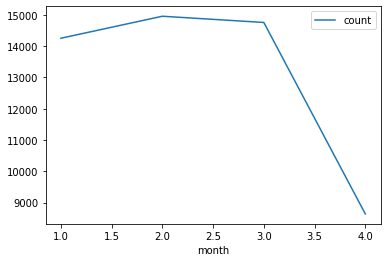

In [11]:
d.plot(x = "month", y = "count")